# Classification Logestic Regression

###  Packeges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### warning  hide

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data set

In [3]:
data = pd.read_csv("C:\\Users\\Kamrul Hasan\\Desktop\\Task_1\\Alpha_bank.csv")
data

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,housemaid,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin.,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin.,married,Professional_Education,no,no,no,no
...,...,...,...,...,...,...,...,...
30472,73,retired,married,Professional_Education,no,yes,no,yes
30473,46,blue-collar,married,Professional_Education,no,no,no,no
30474,56,retired,married,Tertiary_Education,no,yes,no,no
30475,44,technician,married,Professional_Education,no,no,no,yes


### droping  some tables

In [4]:
data.drop(['Job', 'Marital_Status', 'Education', 'Default_Credit'], axis=1, inplace=True)
data.head()

,Age,Housing_Loan,Personal_Loan,Subscribed
0,56,no,no,no
1,37,yes,no,no
2,40,no,no,no
3,56,no,yes,no
4,59,no,no,no


### transform subscribe to binaries

In [5]:
data.Housing_Loan = data.Housing_Loan.map({'no': 0, 'yes': 1})
data.Personal_Loan = data.Personal_Loan.map({'no': 0, 'yes': 1})
data.Subscribed = data.Subscribed.map({'no': 0, 'yes': 1})

In [6]:
data

,Age,Housing_Loan,Personal_Loan,Subscribed
0,56,0,0,0
1,37,1,0,0
2,40,0,0,0
3,56,0,1,0
4,59,0,0,0
...,...,...,...,...
30472,73,1,0,1
30473,46,0,0,0
30474,56,1,0,0
30475,44,0,0,1


### creating balance dataset

In [7]:
count_class_0,count_class_1=data.Subscribed.value_counts()
data_0 = data[data['Subscribed'] == 0]
data_1 = data[data['Subscribed'] == 1]

In [8]:
data_0_under = data_0.sample(count_class_1)
F_data = pd.concat([data_0_under, data_1], axis=0)

print('Random under-sampling:')
print(F_data.Subscribed.value_counts())

Random under-sampling:
0    3856
1    3856
Name: Subscribed, dtype: int64


### test and train

In [9]:
Y = F_data.Subscribed.copy()
X = F_data.drop(['Subscribed'], axis=1)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

### Logistic Regression Model

In [11]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [12]:
Y_pred = pd.Series(model.predict(X_test))

In [13]:
Y_test = Y_test.reset_index(drop=True)
Z = pd.concat([Y_test, Y_pred], axis=1)
Z.columns = ['True', 'Prediction']
acc_log = metrics.accuracy_score(Y_test, Y_pred)

In [14]:
Z.head()

,True,Prediction
0,1,1
1,1,1
2,0,0
3,1,0
4,0,0


In [15]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.4953319502074689
Precision: 0.49142156862745096
Recall: 0.4181438998957247


Text(0.5, 15.0, 'Predicted')

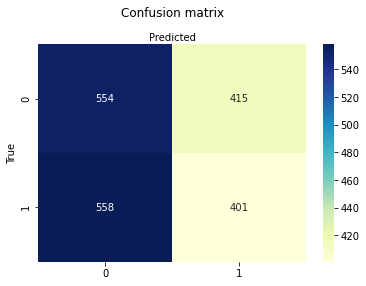

In [16]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

### Classification KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
#X_train, X_test, Y_train, Y_test

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)

acc_knn = metrics.accuracy_score(Y_test, Y_pred)

In [19]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.5311203319502075
Precision: 0.5296017222820237
Recall: 0.5130344108446299


### Classification SVM

In [20]:
from sklearn.svm import SVC, LinearSVC

In [21]:
#X_train, X_test, Y_train, Y_test,Y_pred

linear_svc = LinearSVC()

linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = metrics.accuracy_score(Y_test, Y_pred)

In [22]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.5025933609958506
Precision: 0.0
Recall: 0.0


### Classification Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
#X_train, X_test, Y_train, Y_test,Y_pred
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)

acc_gaussian = metrics.accuracy_score(Y_test, Y_pred)

In [25]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.549792531120332
Precision: 0.5799648506151143
Recall: 0.34410844629822734


### Classification Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)

acc_decision = metrics.accuracy_score(Y_test, Y_pred)

In [28]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.5477178423236515
Precision: 0.5561290322580645
Recall: 0.4494264859228363


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

acc_rf = metrics.accuracy_score(Y_test, Y_pred)

In [31]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.5534232365145229
Precision: 0.56125
Recall: 0.4681960375391032


###  Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
SDG = SGDClassifier()
SDG.fit(X_train, Y_train)
Y_pred = SDG.predict(X_test)

acc_SDG = metrics.accuracy_score(Y_test, Y_pred)

In [34]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.5025933609958506
Precision: 0.0
Recall: 0.0


In [35]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Naive Bayes',  
              'Decision Tree',  'RandomForestClassifier', 'SGDClassifier'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision, acc_rf,acc_SDG ]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.553423,RandomForestClassifier
0.549793,Naive Bayes
0.547718,Decision Tree
0.531120,KNN
0.502593,Support Vector Machines
0.502593,SGDClassifier
0.495332,Logistic Regression


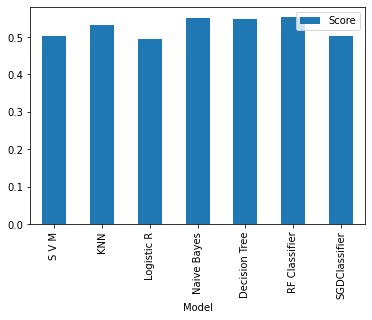

In [36]:
results= pd.DataFrame({'Model': ['S V M', 'KNN', 'Logistic R','Naive Bayes',  
              'Decision Tree',  'RF Classifier', 'SGDClassifier'], 'Score': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision, acc_rf,acc_SDG ]})

ax = results.plot.bar(x='Model', y='Score', rot=90)